#  머신 러닝 시작하기
- https://tensorflow.blog/%ED%95%B4%EC%BB%A4%EC%97%90%EA%B2%8C-%EC%A0%84%ED%95%B4%EB%93%A4%EC%9D%80-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-1/

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [17]:
print(diabetes.target[:10])

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [18]:
print(diabetes.data[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]


Text(0, 0.5, 'y')

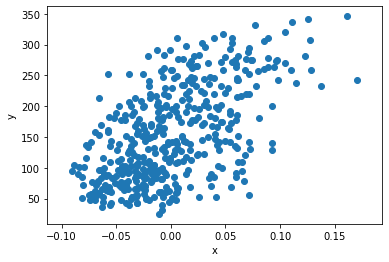

In [19]:
plt.scatter(diabetes.data[:,2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')

In [20]:
class SingleNeuron1(object):
    def __init__(self):
        self._w=0
        self._b=0
        self._x=0
        
    def set_params(self, w, b):
        self._w=w
        self._b=b
        
    def forpass(self, x):
        self._x=x
        _y_hat=self._w * self._x + self._b
        return _y_hat

n1=SingleNeuron1()
n1.set_params(5,1)
print(n1.forpass(3))

16


In [21]:
n1.set_params(6,1)
print(n1.forpass(3))

19


In [22]:
n1.set_params(5,1)
print(n1.forpass(4))

21


In [23]:
class SingleNeuron2(object):
    def __init__(self):
        self._w=0
        self._b=0
        self._x=0
        
    def set_params(self, w, b):
        self._w=w
        self._b=b
        
    def forpass(self, x):
        self._x=x
        _y_hat=self._w * self._x + self._b
        return _y_hat
    
    def backprop(self, err):
        m=len(self._x)
        self._w_grad=0.1*np.sum(err*self._x) / m
        self._b_grad=0.1*np.sum(err*1) / m
        
    def update_grad(self):
        self.set_params(self._w+self._w_grad, self._b+self._b_grad)
        
    
        

In [24]:
n2=SingleNeuron2()
for i in range(30000):
    y_hat=n2.forpass(diabetes.data[:,2])
    error=diabetes.target-y_hat
    n2.backprop(error)
    n2.update_grad()
print('Final w', n2._w)
print('Final b', n2._b)

Final w 948.3651421782777
Final b 152.13348416289656


In [27]:
#sikitrun, 확률적 경사하강법

from sklearn import linear_model
sgd_regr = linear_model.SGDRegressor(loss='squared_loss', penalty='none', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=10000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False)
sgd_regr.fit(diabetes.data[:, 2].reshape(-1, 1), diabetes.target)
print('Coefficients: ', sgd_regr.coef_,sgd_regr.intercept_)

Coefficients:  [829.19972279] [152.12613215]


In [28]:
#sikitrun, 최소제곱법(Ordinary Least Square, OLS)

sgd_regr = linear_model.LinearRegression(max_iter=10000)
sgd_regr.fit(np.vstack(diabetes.data[:, 2]), diabetes.target)
print('Coefficients: ', sgd_regr.coef_, sgd_regr.intercept_)

TypeError: __init__() got an unexpected keyword argument 'max_iter'